## Data Exploration
Basic statistics and probability mass function of abnormal bat calls from training dataset

### Training Data Summary
*also see Yang Peng result*

In [24]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

In [6]:
def get_training_summary():
    
    year2015 = pd.read_table(os.path.join('../data','2015_night.txt'), 
                          header=0, engine='python')
    year2015['Name']=year2015.Folder1 + year2015.Folder2.astype(str)
    
    year2016 = pd.read_table(os.path.join('../data', '2016_night.txt'), 
                            header=0, engine='python')
    year2016['Name']=year2016.Folder1 + year2016.Folder2.astype(str)

    year2017 = pd.read_table(os.path.join('../data', '2017_night.txt'), 
                            header=0, engine='python')
    year2017['Name']=year2017.Folder1 + year2017.Folder2.astype(str)
    
    year2018 = pd.read_table(os.path.join('../data', '2018_night.txt'), 
                            header=0, engine='python')
    year2018['Name']=year2018.Folder1 + year2018.Folder2.astype(str)


    return year2015, year2016, year2017, year2018

In [7]:
#get number of files in each training dataset folder

def get_nfile(df):
    df.loc[(df.Label != 'social') |(df.Label != 'foraging')|(df.Label != 'Feeding'), 'Normal'] = 1
    df.loc[(df.Label == 'social')|(df.Label == 'foraging')|(df.Label == 'Feeding'), 'Normal'] = 0
    df.loc[(df.Label != 'social') |(df.Label != 'foraging')|(df.Label != 'Feeding'), 'Abnormal'] = 0
    df.loc[(df.Label == 'social')|(df.Label == 'foraging')|(df.Label == 'Feeding'), 'Abnormal'] = 1
    df['nfile1']=df['Number']*df['Abnormal']
    df['nfile0']=df['Number']*df['Normal']
    nfile=(df.groupby(['Name'])['nfile0'].sum())-(df.groupby(['Name'])['nfile1'].sum())
        
    return nfile

In [8]:
year2015, year2016, year2017, year2018 = get_training_summary()

In [10]:
nfile_2015=get_nfile(year2015)
nfile_2016=get_nfile(year2016)
nfile_2017=get_nfile(year2017)
nfile_2018=get_nfile(year2018)

In [11]:
print year2015.head()

  Folder1   Folder2       Night Label  Number            Name  Normal  \
0  cell-0  20150717  2015/07/17  LABO       9  cell-020150717     1.0   
1  cell-0  20150717  2015/07/17  NOID       7  cell-020150717     1.0   
2  cell-0  20150717  2015/07/17  NYHU      10  cell-020150717     1.0   
3  cell-0  20150717  2015/07/17  PESU       1  cell-020150717     1.0   
4  cell-0  20150717  2015/07/17  TABR       2  cell-020150717     1.0   

   Abnormal  nfile1  nfile0  
0       0.0     0.0     9.0  
1       0.0     0.0     7.0  
2       0.0     0.0    10.0  
3       0.0     0.0     1.0  
4       0.0     0.0     2.0  


In [12]:
print nfile_2015.head()

Name
cell-020150717     29.0
cell-020150718     27.0
cell-120150612     27.0
cell-120150613     10.0
cell-1220150614    17.0
dtype: float64


### Basic statistics
Histogram of file with abnormal vs. file with normal calls for each year. 
*see Thien Le result*

### Probability Mass Function
Given total files per year, what is the probability of finding a recording contains non-echolation bat calls in each given folder, also given the average number of recording files per folder for each year. Note: all files (n-hat) in the folder are processed without replacement.

In [13]:
#From Data Dictionary.pdf
N_2015=2527
N_2016=2766
N_2017=3124
N_2018=2209
N=[N_2015,N_2016,N_2017,N_2018]
M_2015=64
M_2016=32
M_2017=44
M_2018=56
M=[M_2015,M_2016,M_2017,M_2018]

In [14]:
#get n-hat for each year
n_2015=N_2015//len(year2015.groupby('Name'))
n_2016=N_2016//len(year2016.groupby('Name'))
n_2017=N_2017//len(year2017.groupby('Name'))
n_2018=N_2015//len(year2018.groupby('Name'))
n_hat=[n_2015,n_2016,n_2017,n_2018]

In [15]:
#get theta-hat for each year
p_2015=M_2015/float(N_2015)
p_2016=M_2016/float(N_2016)
p_2017=M_2017/float(N_2017)
p_2018=M_2018/float(N_2018)
theta_hat=[p_2015,p_2016,p_2017,p_2018]

In [16]:
#get number of iteration (=size) based on number of total folder in each year
s_2015=len(year2015.groupby('Name'))
s_2016=len(year2016.groupby('Name'))
s_2017=len(year2017.groupby('Name'))
s_2018=len(year2018.groupby('Name'))
size=[s_2015,s_2016,s_2017,s_2018]

In [17]:
#Create PMF dataframe
year=[2015,2016,2017,2018]
columns=["year","N","M","n_hat","theta_hat","size"]
PMF_df=pd.DataFrame({'year':year,'N':N,'M':M,'n_hat':n_hat,'theta_hat':theta_hat,'size':size}, columns=columns)
print PMF_df

   year     N   M  n_hat  theta_hat  size
0  2015  2527  64     41   0.025326    61
1  2016  2766  32     36   0.011569    75
2  2017  3124  44     49   0.014085    63
3  2018  2209  56     45   0.025351    56


In [25]:
#Approximate hypergeometric with binomial distribution

def get_dist(n,p,size):
    random.seed(125)
    dist = stats.binom.rvs(n=n, p=p, size=size)  
    pd.DataFrame(dist).hist(range=(-0.5,10.5), bins=11, ec='black')

Text(0,0.5,'Frequency')

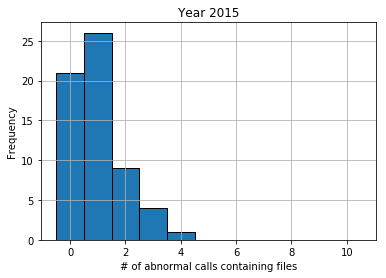

In [26]:
get_dist(n=n_2015,p=p_2015,size=s_2015)
plt.title('Year 2015')
plt.xlabel('# of abnormal calls containing files')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

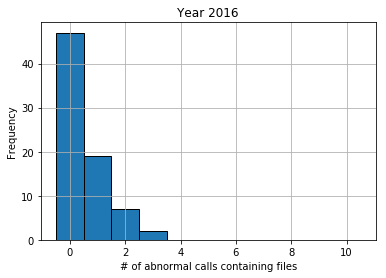

In [27]:
get_dist(n=n_2016,p=p_2016,size=s_2016)
plt.title('Year 2016')
plt.xlabel('# of abnormal calls containing files')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

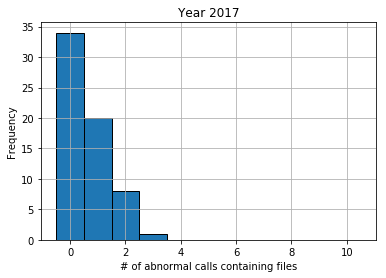

In [28]:
get_dist(n=n_2017,p=p_2017,size=s_2017)
plt.title('Year 2017')
plt.xlabel('# of abnormal calls containing files')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

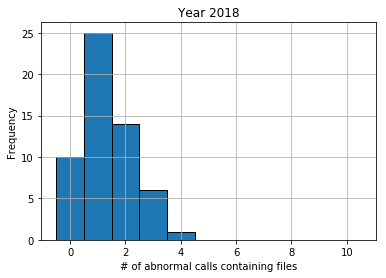

In [29]:
get_dist(n=n_2018,p=p_2018,size=s_2018)
plt.title('Year 2018')
plt.xlabel('# of abnormal calls containing files')
plt.ylabel('Frequency')

**_In here, we only plot PMF for year 2015_**

In [30]:
non_echo=[]
for k in range(11):
    non_echo_pmf=stats.binom.pmf(k=k, n=n_2015, p= p_2015) 
    non_echo.append(non_echo_pmf)

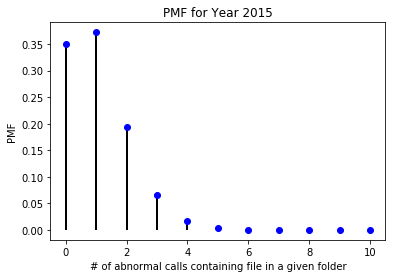

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(11), non_echo, 'bo')
ax.vlines(range(11), 0, non_echo, lw=2)
ax.set_xlabel('# of abnormal calls containing file in a given folder')
ax.set_ylabel('PMF')
plt.title('PMF for Year 2015')
plt.show()

__Interpretation__: For batch processing of data, the probability of finding none to one recording file that contains abnormal calls is most likely to happen in at least 3 out of 10 given folder. About 2 out of 10 given folder will probably contain 2 files that contain abnormal calls. 

### Signals Summary
*see YP and HS results*